# WeatherPy
----



In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key
temp_units = "imperial"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count 
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | nokha
Processing Record 5 of Set 1 | abu samrah
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | kalianget
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | waipawa
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | lamar
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | igrim
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | rikitea
Processing Record 24 of Set 1 | new norfolk
Processing Record 25 of Set 1

Processing Record 42 of Set 4 | vestmannaeyjar
Processing Record 43 of Set 4 | esmeralda
City not found. Skipping...
Processing Record 44 of Set 4 | avera
Processing Record 45 of Set 4 | zyryanka
Processing Record 46 of Set 4 | puerto madryn
Processing Record 47 of Set 4 | zhuhai
Processing Record 48 of Set 4 | arica
Processing Record 49 of Set 4 | hambantota
Processing Record 1 of Set 5 | san miguel
Processing Record 2 of Set 5 | batagay-alyta
Processing Record 3 of Set 5 | laurel
Processing Record 4 of Set 5 | yellowknife
Processing Record 5 of Set 5 | jizan
Processing Record 6 of Set 5 | anadyr
Processing Record 7 of Set 5 | jardim
Processing Record 8 of Set 5 | vagur
City not found. Skipping...
Processing Record 9 of Set 5 | chokurdakh
Processing Record 10 of Set 5 | farah
Processing Record 11 of Set 5 | naze
Processing Record 12 of Set 5 | santiago del estero
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 5 | marabba
Processing Record 14 of Set

Processing Record 26 of Set 8 | freeport
Processing Record 27 of Set 8 | senanga
Processing Record 28 of Set 8 | braniewo
Processing Record 29 of Set 8 | fort nelson
Processing Record 30 of Set 8 | najran
City not found. Skipping...
Processing Record 31 of Set 8 | praia
City not found. Skipping...
Processing Record 32 of Set 8 | jimo
Processing Record 33 of Set 8 | changtu
Processing Record 34 of Set 8 | horizontina
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 35 of Set 8 | hualmay
Processing Record 36 of Set 8 | sao jose de ribamar
Processing Record 37 of Set 8 | puerto colombia
Processing Record 38 of Set 8 | albina
Processing Record 39 of Set 8 | male
Processing Record 40 of Set 8 | gillette
Processing Record 41 of Set 8 | russell
Processing Record 42 of Set 8 | akbarpur
Processing Record 43 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | aubenas
City not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:

# show the top of the dataframe
weather_dataframe.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nome,40,US,1570147232,78,30.04,-94.42,87.80,3.36
1,chuy,60,UY,1570147232,81,-33.69,-53.46,57.79,9.60
2,bluff,0,AU,1570147232,39,-23.58,149.07,72.61,8.01
3,nokha,20,IN,1570147232,63,27.56,73.47,81.61,12.21
4,abu samrah,75,JP,1570147233,78,34.51,131.49,82.99,5.82


In [7]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [8]:

weather_dataframe.count()

City          520
Cloudiness    520
Country       520
Date          520
Humidity      520
Lat           520
Lng           520
Max Temp      520
Wind Speed    520
dtype: int64

In [9]:

weather_dataframe.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nome,40,US,1570147232,78,30.04,-94.42,87.80,3.36
1,chuy,60,UY,1570147232,81,-33.69,-53.46,57.79,9.60
2,bluff,0,AU,1570147232,39,-23.58,149.07,72.61,8.01
3,nokha,20,IN,1570147232,63,27.56,73.47,81.61,12.21
4,abu samrah,75,JP,1570147233,78,34.51,131.49,82.99,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

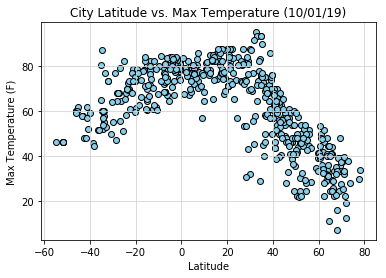

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

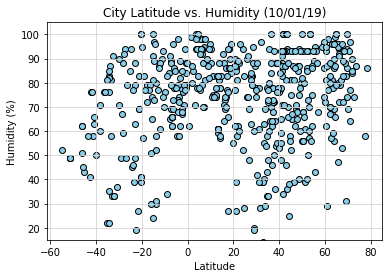

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

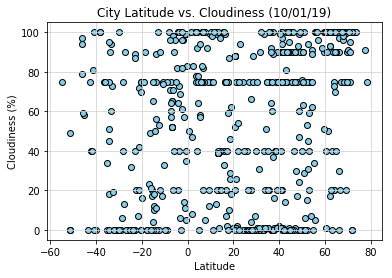

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

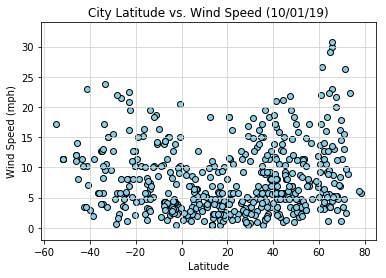

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# plt.savefig("Figures/fig4.png")
plt.show()

Observations :

•	Temperature increases as latitude gets closer to 0 (equator).

•	The highest altitude 60 to 80 is warmer than the lowest -40 to –60.

•	Humidity is more concentrated in higher latitude cities.

•	No relationship between cloudiness and latitude.

•	Most of windspeed data is less than 15 regardless of the latitude .
